## How does Fertility Rate affect Life Expectancy in Nigeria?

Data Source: World Bank

Data Analyst: Alex Idachaba

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [211]:
# Load dataset
fertility = pd.read_csv('Nigeria world devt indicators.csv')
fertility.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Nigeria,NGA,"Presence of peace keepers (number of troops, p...",VC.PKP.TOTL.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nigeria,NGA,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nigeria,NGA,"Intentional homicides, male (per 100,000 male)",VC.IHR.PSRC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
# extract relevant columns and indicators
fertility.drop(['Country Name', 'Country Code', 'Indicator Code'], axis=1, inplace=True)
fertility = fertility.iloc[[118,185, 187]]

In [213]:
# Set Indicator Name as index and transpose the data
fertility.set_index('Indicator Name', inplace=True)

In [214]:
fertility = fertility.transpose().reset_index()
fertility.head(3)

Indicator Name,index,"Population, total","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)"
0,1960,45138458.0,6.354,36.976
1,1961,46063563.0,6.351,37.431
2,1962,47029822.0,6.346,37.871


In [215]:
# Rename columns
fertility.rename(columns={'index':'Years', 
                          'Fertility rate, total (births per woman)':'Fertility_Rate',
                         'Life expectancy at birth, total (years)':'Life_expectancy',
                         'Population, total':'Population'}, inplace=True)

In [216]:
# Check for Null values
fertility = fertility.dropna(how='any',axis=0)
fertility.head()

Indicator Name,Years,Population,Fertility_Rate,Life_expectancy
0,1960,45138458.0,6.354,36.976
1,1961,46063563.0,6.351,37.431
2,1962,47029822.0,6.346,37.871
3,1963,48032934.0,6.341,38.291
4,1964,49066760.0,6.336,38.691


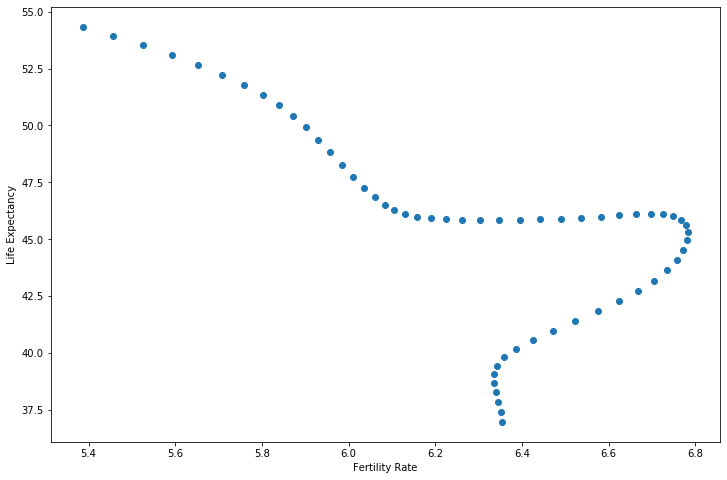

In [217]:
# Lets plot the scatter plot to see relationship
plt.figure(figsize=(12,8))
plt.scatter(fertility['Fertility_Rate'], fertility['Life_expectancy'])
plt.xlabel('Fertility Rate')
plt.ylabel('Life Expectancy')
plt.show()

Fertility rate among women has been declining over the last 23 years while life expectancy among Nigerians has been increasing over the same period.